### ED Figure 9

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
dSdt_DZT_4km_Decadal_wthp  = xr.open_dataset('Freshwater_Flux_4km_WT.nc').dSdt_DZT_4km
dSdt_DZT_4km_Decadal_wthmp = xr.open_dataset('Freshwater_Flux_4km_WTM.nc').dSdt_DZT_4km
dSdt_DZT_4km_Decadal_mp    = dSdt_DZT_4km_Decadal_wthmp - dSdt_DZT_4km_Decadal_wthp

dSdt_DZT_4km_Decadal = calc_fwf_4km(dSdt_DZT_4km_Decadal_wthp,dSdt_DZT_4km_Decadal_wthmp,dSdt_DZT_4km_Decadal_mp)

#### Plot

In [3]:
levs = np.arange(-1.0,1.01,0.1)*1

In [4]:
def make_plot9_SouthPolarStereo(var,unit,levs,colormap,PI):
    ''''''
    latN = -35
    
    hi,hj = 8,8
    ncol,nrow = 3,3
    
    titles = [str(YS[ii])+'$-$'+str(YE[ii]) for ii in range(ntime)]
    subtitles = ['Wind$+$Thermal$+$Meltwater','Wind$+$Thermal','Meltwater Component']
    ys_loc = [0.175,0.315,0.230]
    labels = ['a)','b)','c)','d)','e)','f)','g)','h)','i)']
    
    geolon = geolon_t_01[::PI,::PI]
    geolon[:,0],geolon[:,np.size(geolon[0,:])-1] = -280,80
    ''''''
    fig = plt.figure(1,figsize=(hi*ncol-1,hj*nrow))
    gs = gridspec.GridSpec(ncols=ncol,nrows=nrow,wspace=0.02,hspace=0.065,width_ratios=np.ones(ncol),height_ratios=np.ones(nrow))
    st = fig.suptitle('',fontsize=16)
    kk=0
    for ii in range(nrow):
        for jj in range(ncol):
            ax = plt.subplot(gs[kk],projection=ccrs.SouthPolarStereo(central_longitude=0.0,globe=None))
            add_circle(ax)
            p1 = ax.contourf(geolon,geolat_t_01[::PI,::PI],var[ii,jj,::PI,::PI],cmap=colormap,levels=levs,extend='both',zorder=5,transform=ccrs.PlateCarree())
            ax.contour(contour_4000m.xt_ocean,contour_4000m.yt_ocean,contour_4000m,[0,1],colors='k',linewidths=0.5,alpha=0.3,zorder=10,transform=ccrs.PlateCarree())
            antarctic_map(ax,False,False,geolon_t_01,geolat_t_01,land_mask_01)
            ax.set_extent([-180,180,-90,latN],crs=ccrs.PlateCarree())
            add_grid_labels_SouthPolarStereo(ax,60,10,360,0,315,-180,latN,0.55,12,[1.08,0.71,0.96,0.995,0.94,1.0],1.11)
            gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=False,linewidth=1,color='gray',alpha=0.5,linestyle='--',zorder=10)
            gl.xlocator = mticker.FixedLocator(np.arange(-180,180+1,60))
            gl.ylocator = mticker.FixedLocator(np.arange(-90,0+1,10))
            
            fcolor = 'dimgrey'
            plt.text(-70,-77.0,'Weddell',fontsize=14,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
            plt.text( 75,-81.0,'Prydz'  ,fontsize=14,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
            plt.text(170,-72.0,'Adélie' ,fontsize=14,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
            plt.text(210,-77.5,'Ross'   ,fontsize=14,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
            
            if ii==0:
                ax.set_title(titles[jj],fontsize=20,loc='center',y=1.065)
            if jj==0:
                ax.set_title(subtitles[ii],fontsize=20,loc='right',x=-0.085,y=ys_loc[ii],rotation=90)
            if kk==0:
                plt.text(132.5,-61.0,'AAB',fontsize=18,transform=ccrs.PlateCarree(),zorder=15)
                plt.text( 52.5,-63.5,'WEB',fontsize=18,transform=ccrs.PlateCarree(),zorder=15)
                plt.text( -120,-58.5,'ABB',fontsize=18,transform=ccrs.PlateCarree(),zorder=15)
            ax.set_title(labels[kk],fontsize=18,loc='left',x=0.05,y=0.9)
            kk=kk+1
            
    # Plot a colorbar
    cax = plt.axes([0.25,0.08,0.525,0.012])
    cb = plt.colorbar(p1,cax=cax,orientation='horizontal',ticks=levs[::2])
    cb.ax.tick_params(axis='x',direction='in',length=12,labelsize=18)
    cb.ax.set_xlabel(unit,fontsize=20,labelpad=6)
    cax.xaxis.set_label_position('top')

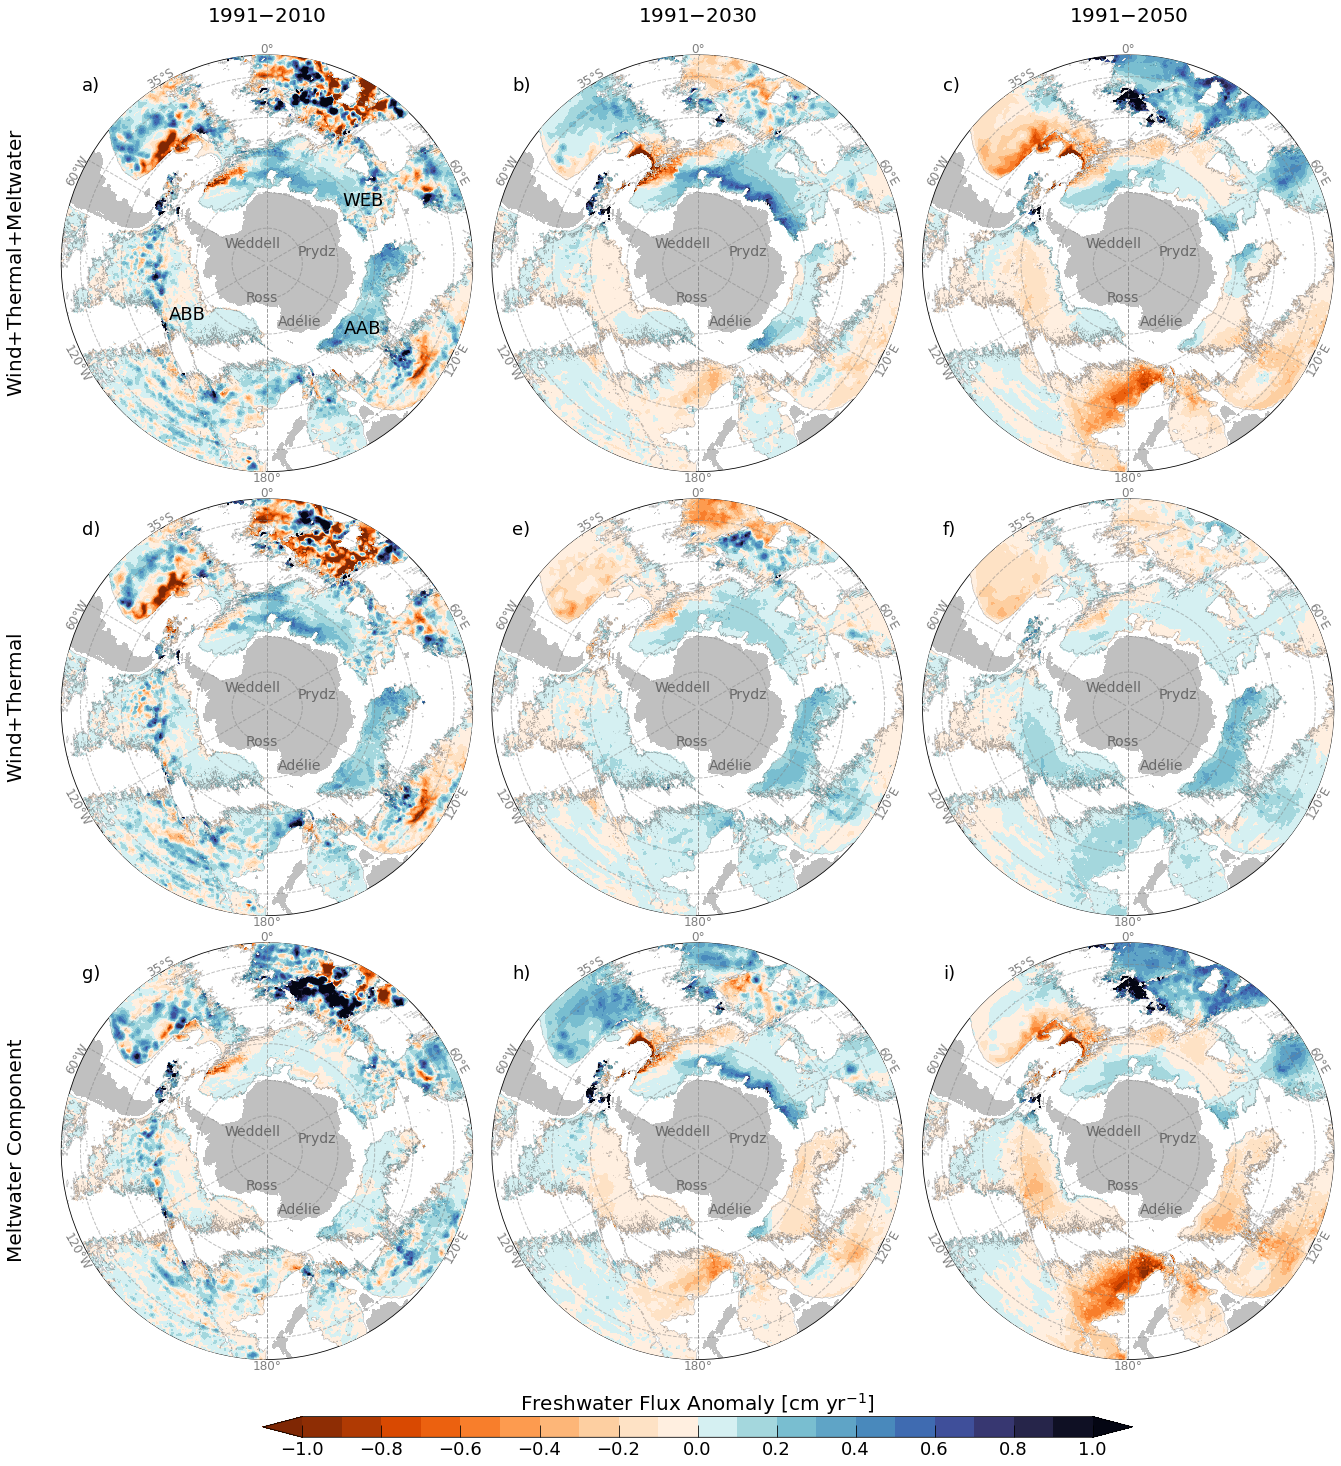

In [5]:
make_plot9_SouthPolarStereo(dSdt_DZT_4km_Decadal,unit,levs,colormap,PI)